# Bankruptcy company prediction

# 1- les attributs

In [ ]:
#### import librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2- data

In [2]:
df = pd.read_csv('C:/Users/Imen/Downloads/arturo/faillite/data_entreprise.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# 3- analyse data

In [6]:
#### voir les types de nos features et notre target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
###### les valeurs manquantes
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
###### les valeurs dupliquée
df.duplicated().sum()

0

In [6]:
### on n'a pas des valeurs manquantes ni des valeurs dupliquées

In [7]:
#### identifier notre target 'Bankrupt'
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

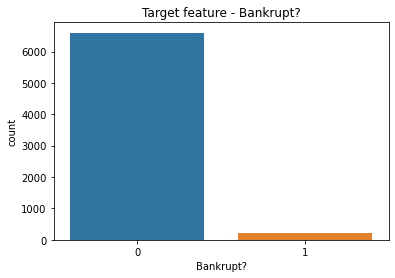

In [8]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

In [9]:
###### aprés qu'on à analyser notre target il faux qu'on analyses nos features pour mieux comprendre notre 
###data et résoudre le probléme de balancing

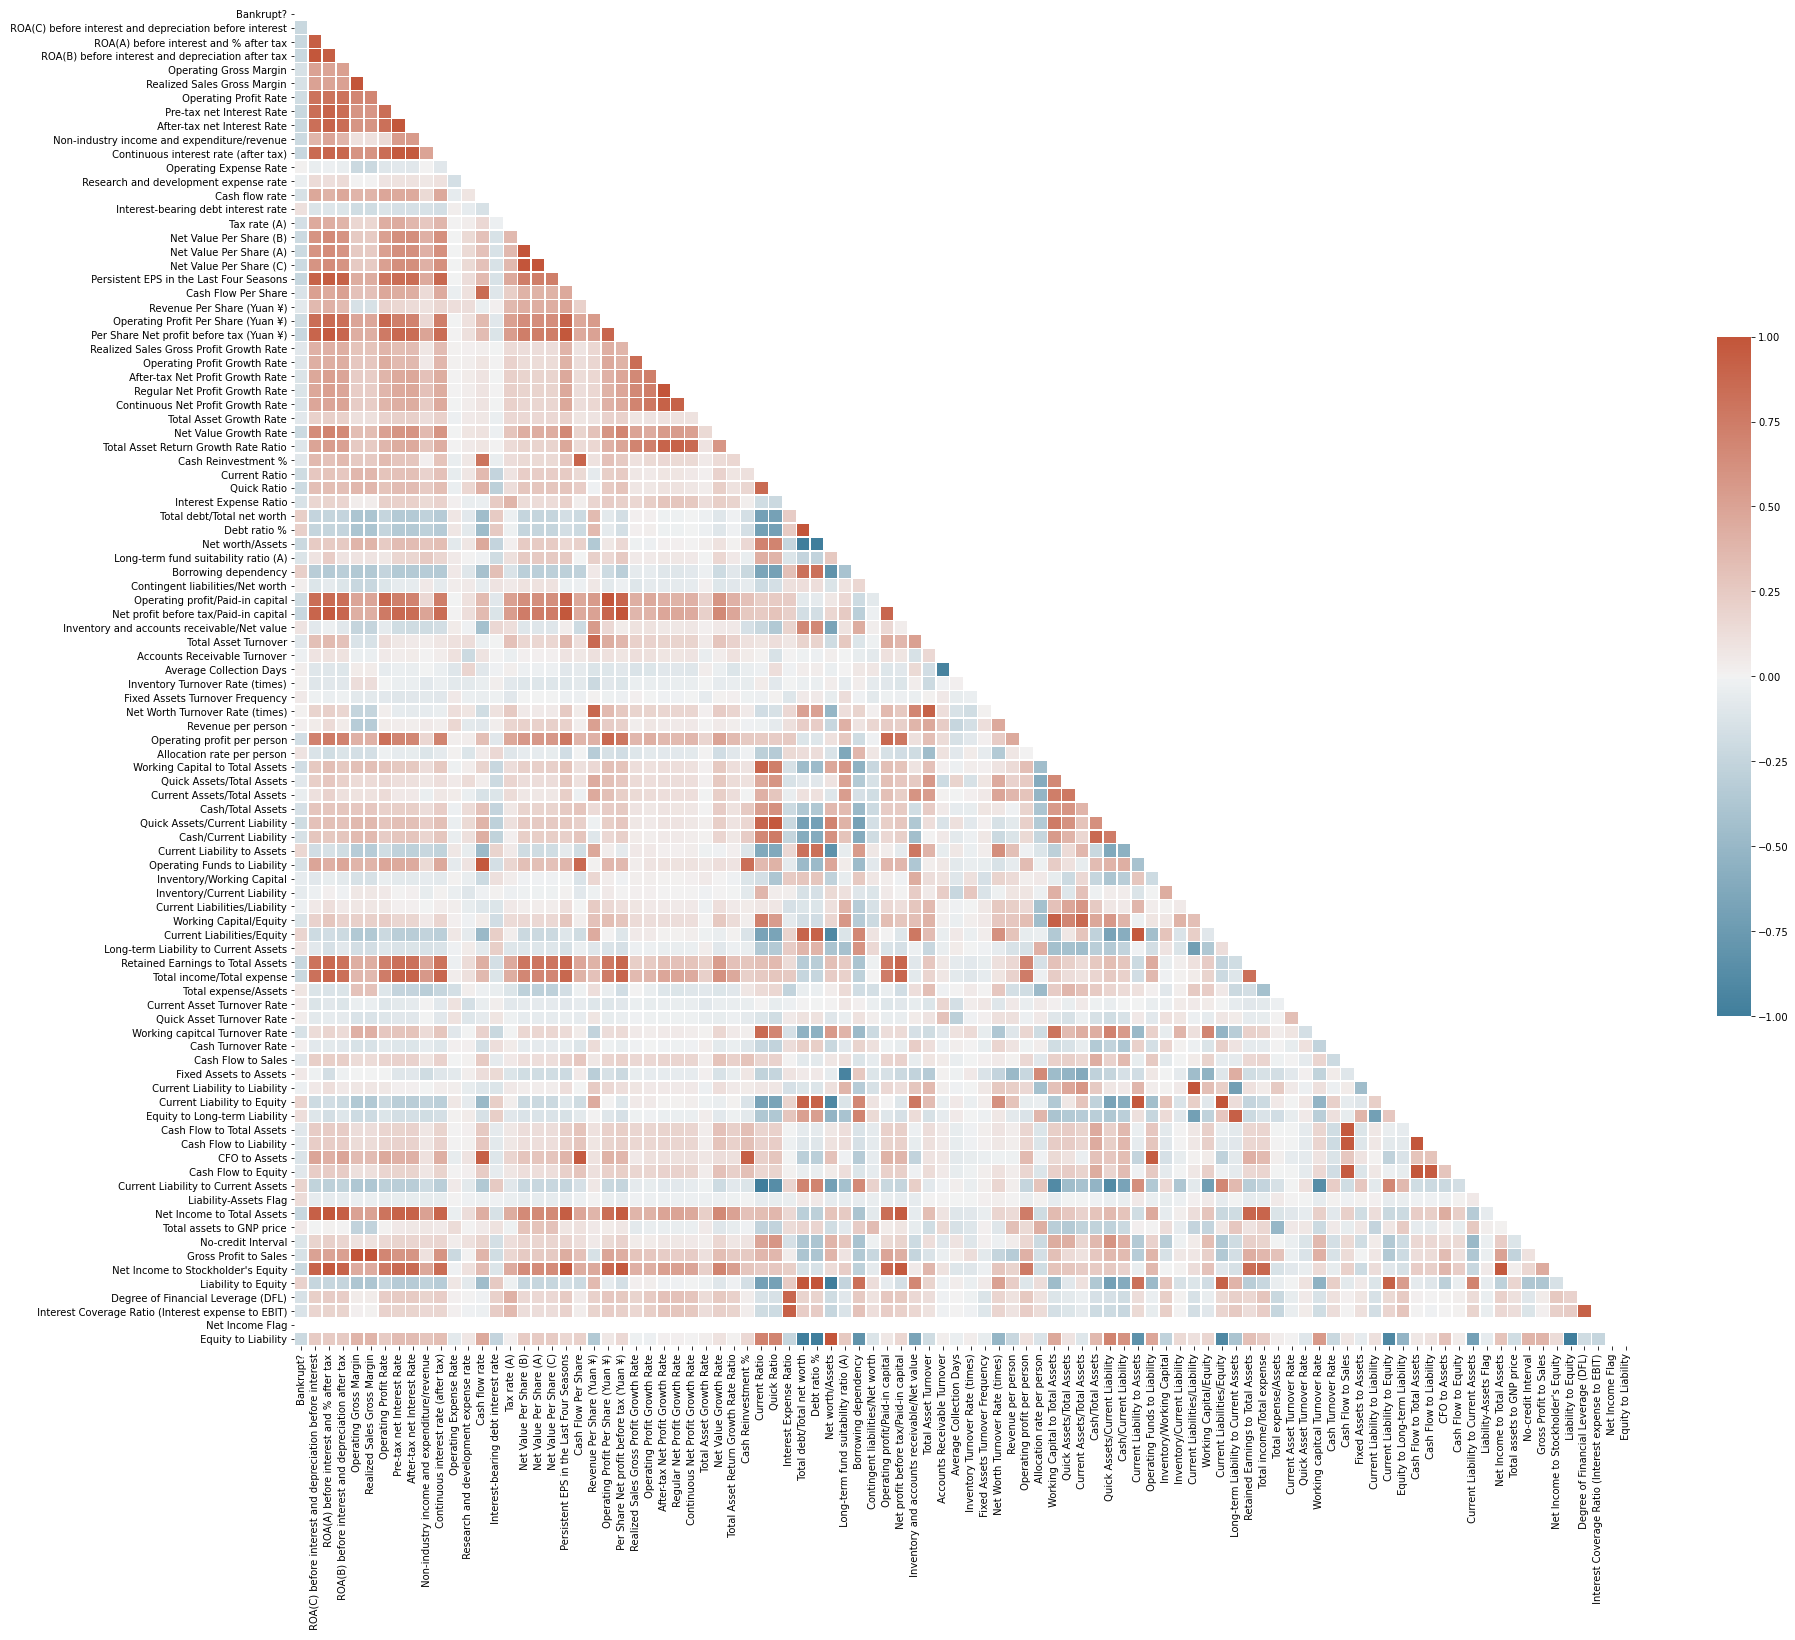

In [10]:

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [11]:
### vu qu'on 95 futures c'est un peux compliquée de vizualiser les corrélations

In [12]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [14]:
##### on à 3 feautures catégoriel compris la target c'est a dire des valeurs entre 0 et 1

In [15]:
##### explorer liability_assets_flag
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

Text(0.5, 1.0, 'Liability-Assets Flag')

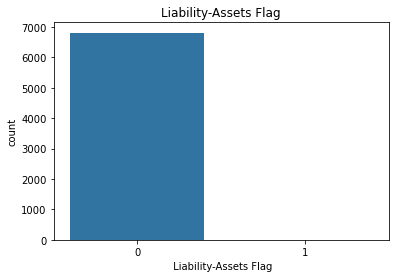

In [16]:
sns.countplot(x=df[' Liability-Assets Flag'])
plt.title('Liability-Assets Flag')

In [17]:
#######explorer Net Income flag
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

Text(0.5, 1.0, ' Net Income Flag')

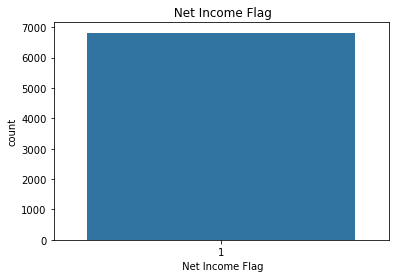

In [18]:
sns.countplot(x=df[' Net Income Flag'])
plt.title(' Net Income Flag')

In [19]:
### on 2 colonnes catégoriel qui contiennent que des 0 ou des 1 la meilleur solution est de les droper par la suite

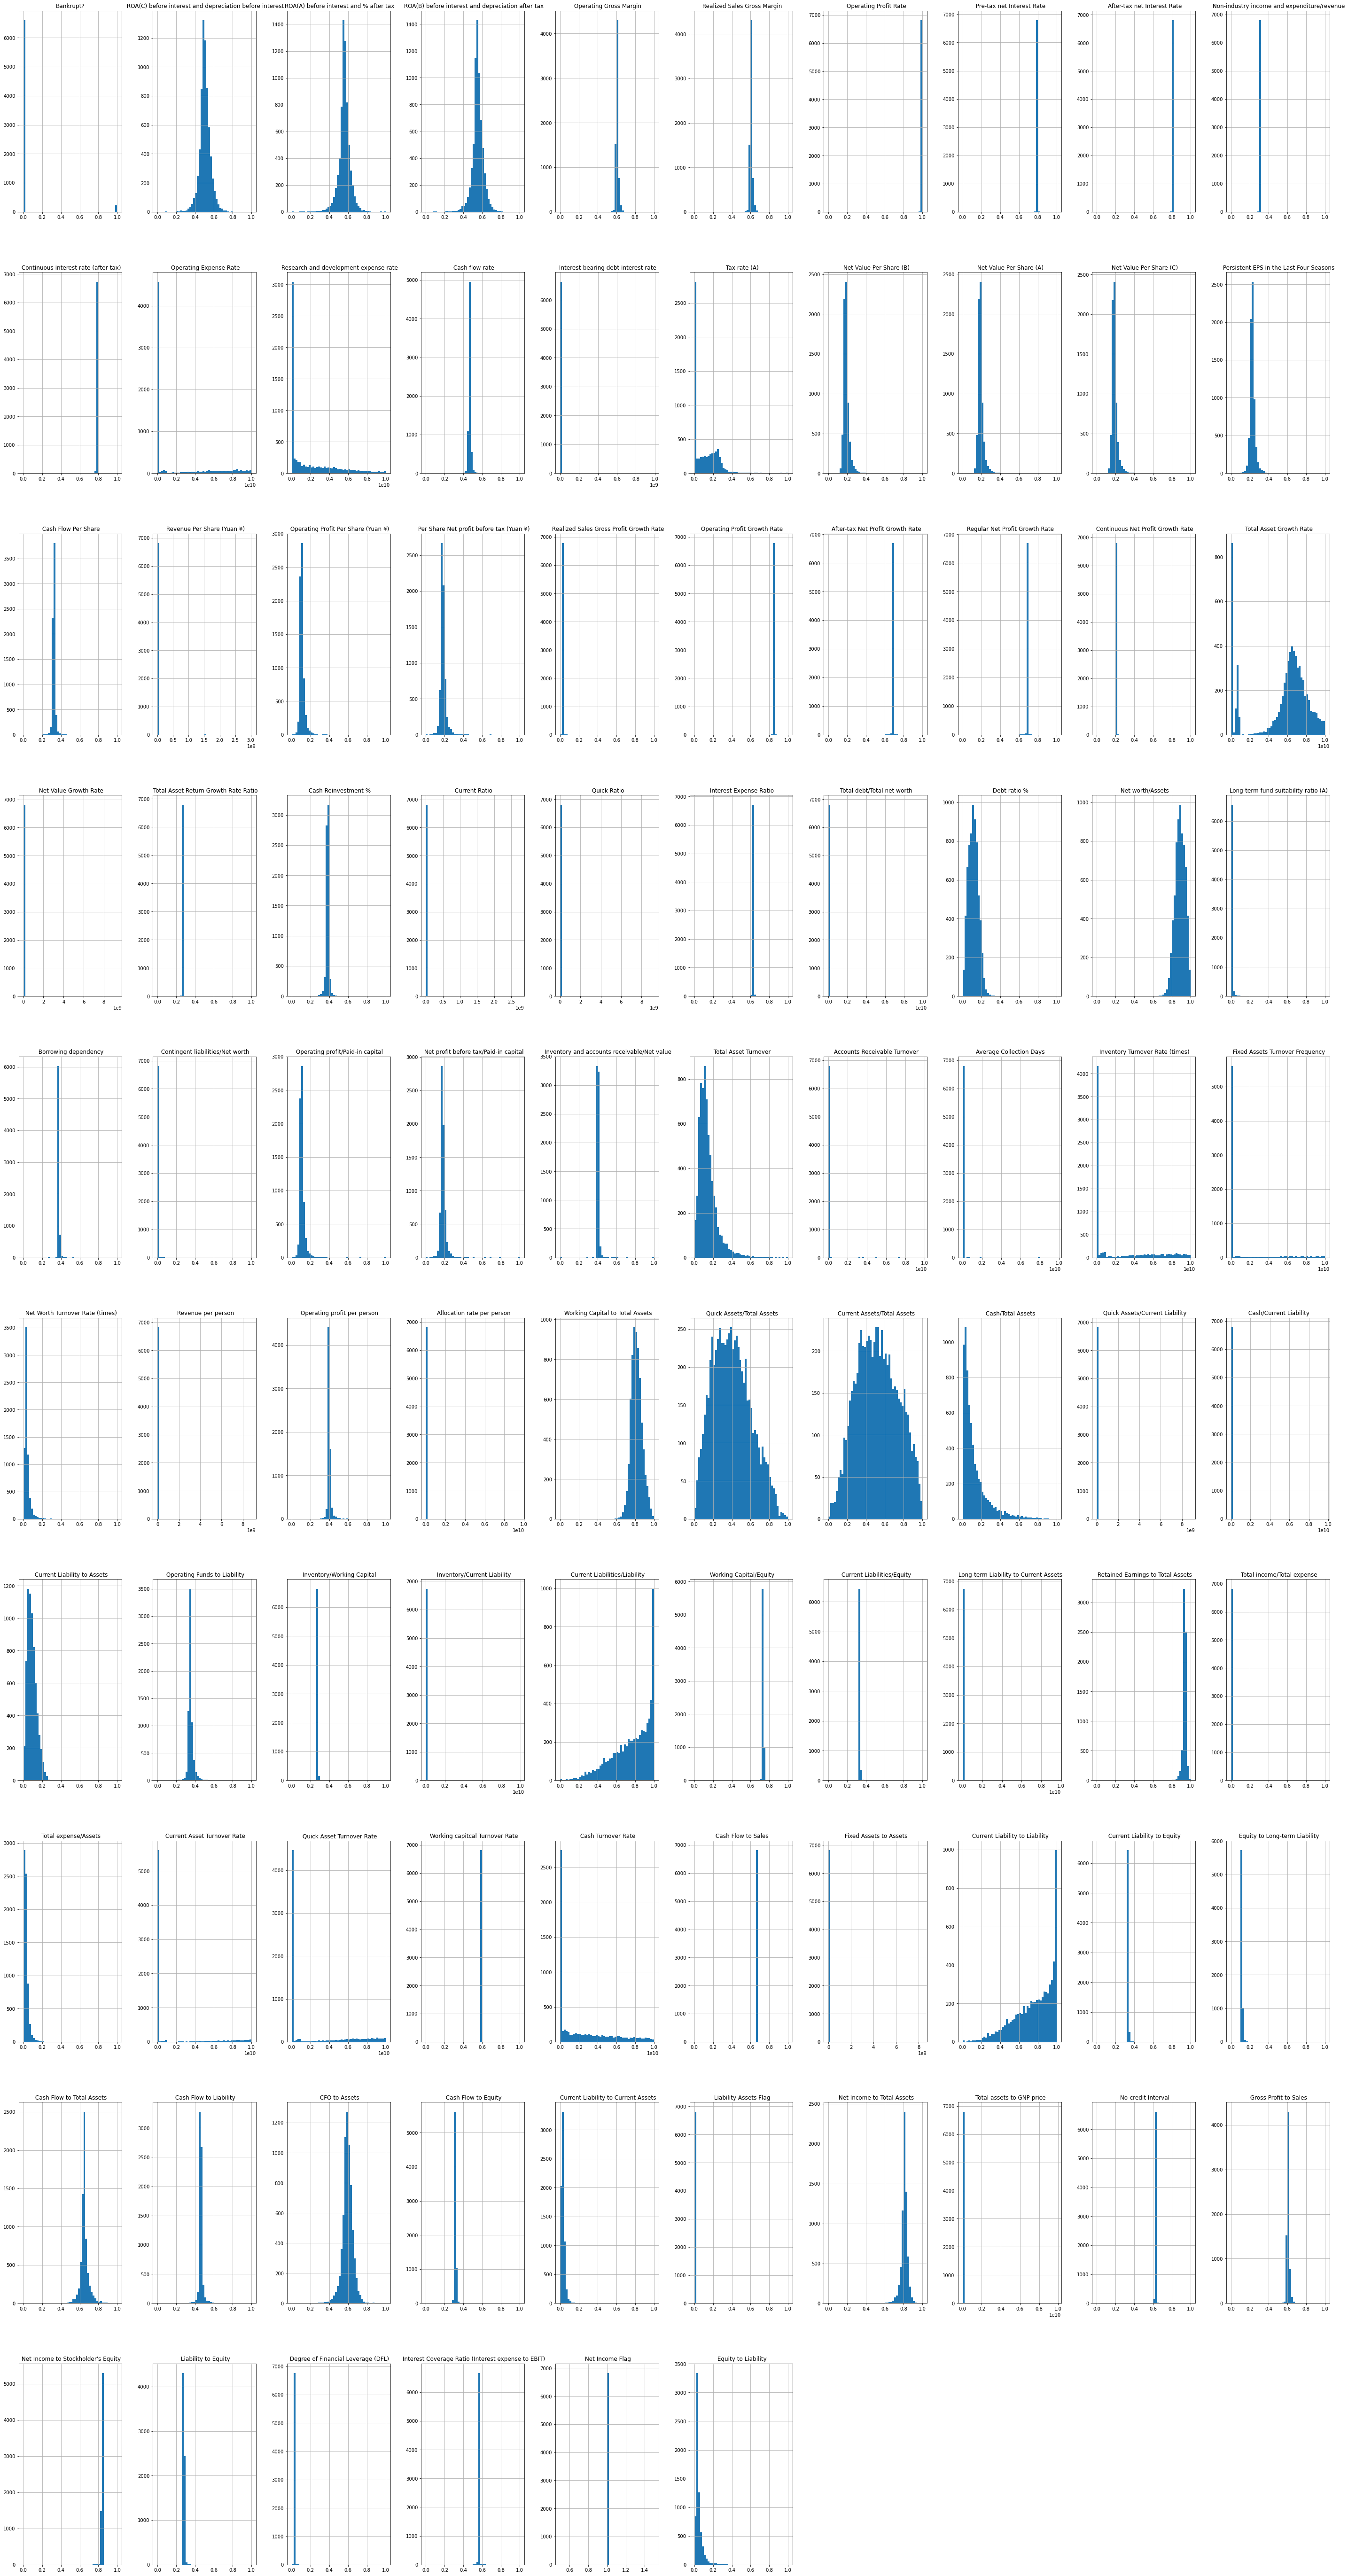

In [21]:
df.hist(figsize = (50,100), bins = 50)
plt.show()

In [23]:
##### chercher les corrélations

In [24]:
positive_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["Bankrupt?"]].copy()

In [26]:
positive_corr

,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Current Liabilities/Equity,Bankrupt?
0,0.207576,0.147308,0.390284,0.118250,0.290202,0.339077,1
1,0.171176,0.056963,0.376760,0.047775,0.283846,0.329740,1
2,0.207516,0.098162,0.379093,0.025346,0.290189,0.334777,1
3,0.151465,0.098715,0.379743,0.067250,0.281721,0.331509,1
4,0.106509,0.110195,0.375025,0.047725,0.278514,0.330726,1
...,...,...,...,...,...,...,...
6814,0.124618,0.103838,0.373823,0.027951,0.279606,0.330914,0
6815,0.099253,0.089901,0.372505,0.031470,0.278132,0.329753,0
6816,0.038939,0.024414,0.369637,0.007542,0.275789,0.326921,0
6817,0.086979,0.083199,0.369649,0.022916,0.277547,0.329294,0


In [27]:
negative_corr 

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Persistent EPS in the Last Four Seasons,Bankrupt?
0,0.716845,0.424389,0.405750,0.370594,0.792424,0.169141,1
1,0.795297,0.538214,0.516730,0.464291,0.828824,0.208944,1
2,0.774670,0.499019,0.472295,0.426071,0.792484,0.180581,1
3,0.739555,0.451265,0.457733,0.399844,0.848535,0.193722,1
4,0.795016,0.538432,0.522298,0.465022,0.893491,0.212537,1
...,...,...,...,...,...,...,...
6814,0.799927,0.539468,0.543230,0.493687,0.875382,0.216602,0
6815,0.799748,0.538269,0.524172,0.475162,0.900747,0.216697,0
6816,0.797778,0.533744,0.520638,0.472725,0.961061,0.210929,0
6817,0.811808,0.559911,0.554045,0.506264,0.913021,0.228326,0


In [28]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    #value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df)

    plt.tight_layout(pad=0.5)

In [29]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

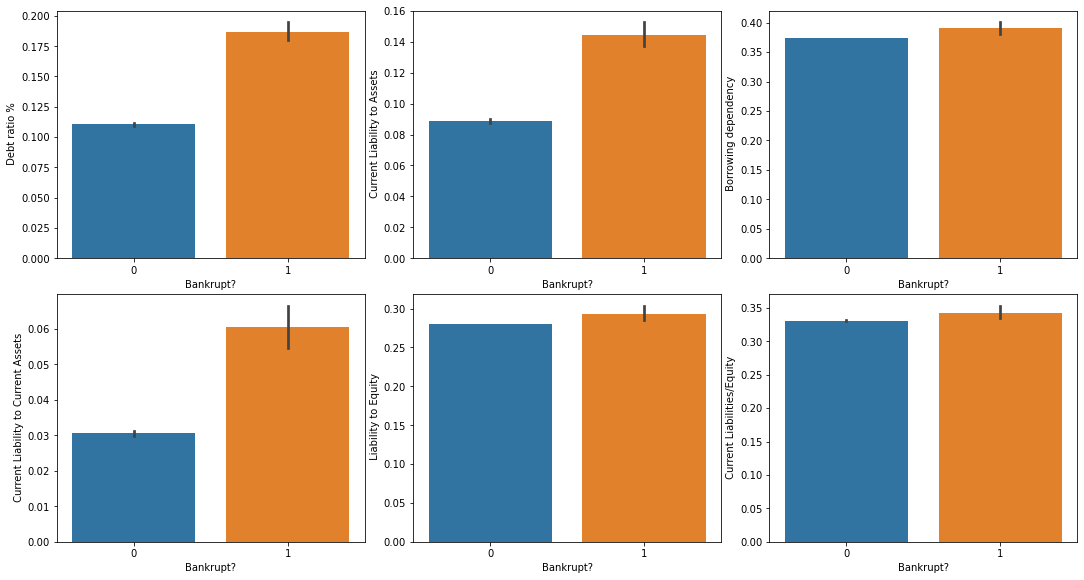

In [30]:
corrbargraph(x_value, y_value)
  

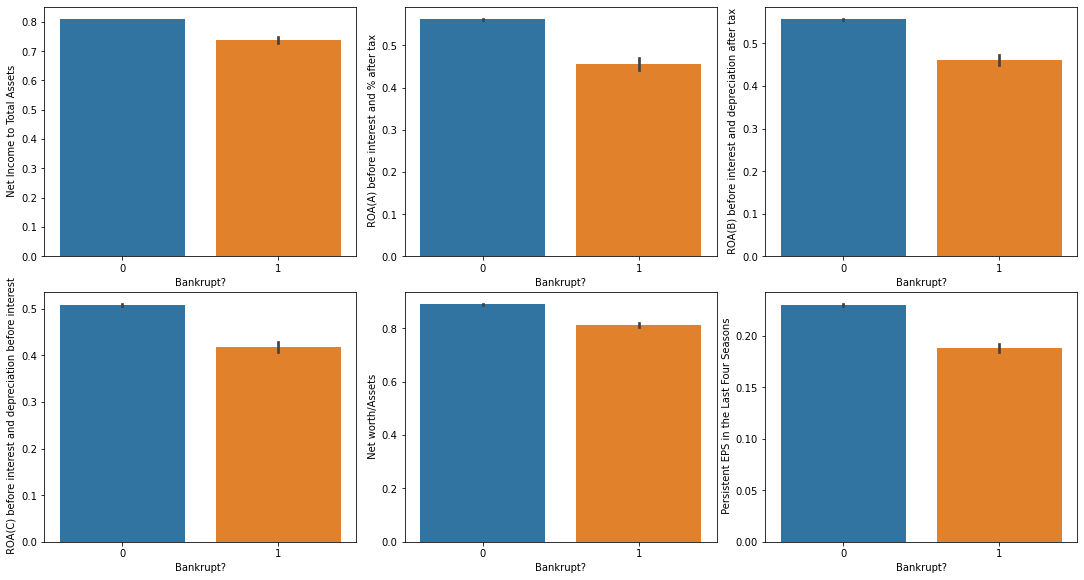

In [31]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

<AxesSubplot:>

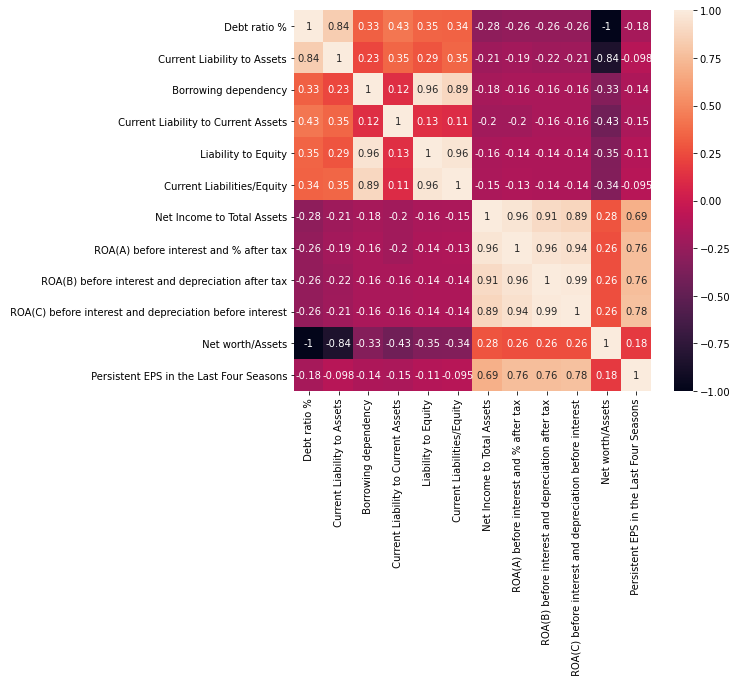

In [32]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)